# Case study on ANOVA

The question is:

XYZ Company has offices in four different zones. The company wishes to investigate the following:

   1.The mean sales generated by each zone.
   
   2.Total sales generated by all the zones for each month.
   
   3.Check whether all the zones generate the same amount of sales.
   

Help the company to carry out their study with the help of data provided.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat


In [15]:
data = pd.read_csv('D:\python programming\Sales_data_zone_wise.csv')

In [16]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [17]:
print('There are ',data.shape[0],'rows and ',data.shape[1],'columns in the dataset.')

There are  29 rows and  5 columns in the dataset.


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [19]:
data.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

So,there is no null values present in the dataset.

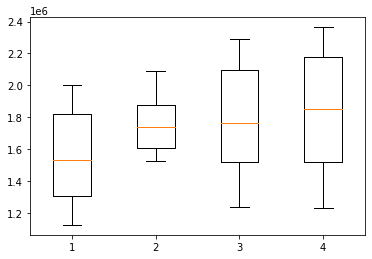

In [20]:
plt.boxplot(data.drop('Month',axis=1));
plt.show()

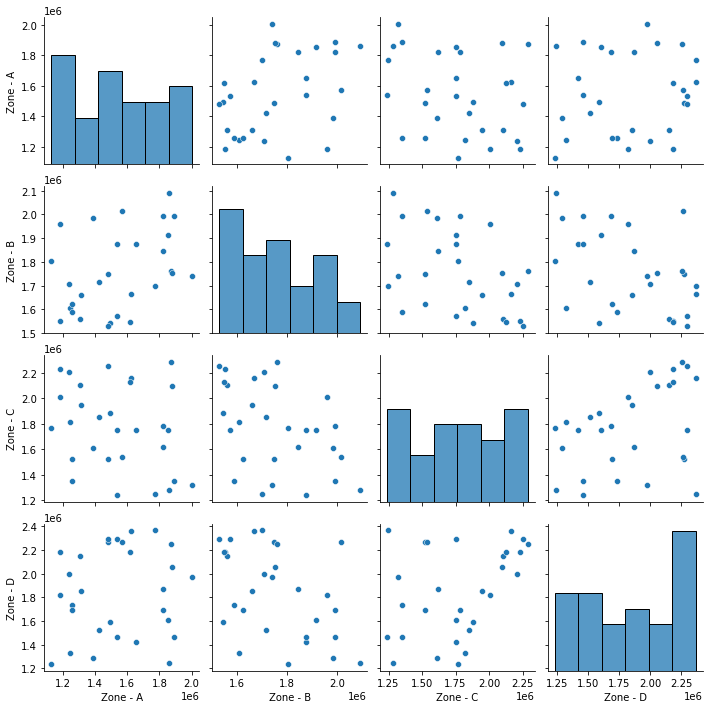

In [21]:
sns.pairplot(data.drop('Month',axis=1))

# 1. The mean sales generated by each zone

In [22]:
df=data.describe()
df

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


#### Zone - D has highest mean and Zone - A has lowest mean

<AxesSubplot:>

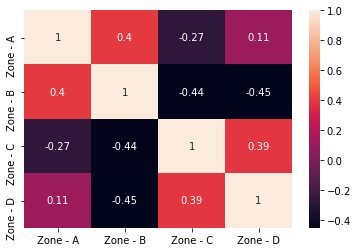

In [23]:
sns.heatmap(data.drop('Month',axis=1).corr(),annot=True)

#### Zone - D has highest positive correlation while  Zone - A has least positive correlation 

# 2. Total sales generated by all the zones for each month

In [24]:
Total_Sales = data.groupby(['Month'])[['Zone - A','Zone - B','Zone - C','Zone - D']].sum().reset_index()
print(Total_Sales)

         Month  Zone - A  Zone - B  Zone - C  Zone - D
0    Month - 1   1483525   1748451   1523308   2267260
1   Month - 10   1852450   1913059   1754314   1608387
2   Month - 11   2004480   1740365   1317869   1970069
3   Month - 12   1537539   1875658   1237722   1460165
4   Month - 13   1254939   1588473   1348629   1733383
5   Month - 14   1821799   1844081   1617376   1872259
6   Month - 15   1128185   1804613   1767047   1234311
7   Month - 16   1491534   1542053   1882159   1590913
8   Month - 17   1182110   1552388   2234469   2180416
9   Month - 18   1770324   1699213   1249821   2364132
10  Month - 19   1181635   1959268   2009168   1821882
11   Month - 2   1238428   1707421   2212113   1994341
12  Month - 20   1305972   1559670   2107949   2151008
13  Month - 21   1570152   2013615   1540016   2265814
14  Month - 22   1481619   1527574   2255729   2295079
15  Month - 23   1887694   1992155   1348387   1459683
16  Month - 24   1880820   1752873   2098463   2052591
17  Month 

# 3. Check whether all the zones generate the same amount of sales.

 Here we consider the one way ANOVA

### H_0: All the zones have same mean

### H_1:Aleast one mean is different

Calculating the F-statistics and p-value

In [25]:
F,p=stat.f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'],axis=0)

In [26]:
print('F-statistics : ',F)
print('p-value : ',p)

F-statistics :  0.11701875483628842
p-value :  0.9493719799421977


### p-value > 0.05

### Hence we have no reason to reject the null hypothesis

### Therefore we can conclude that all the zones generate same amount of sales.